### 1.1 Instal Dependencies and Setup


In [ ]:
!gdown --folder https://drive.google.com/drive/u/1/folders/16OHdO1EFLQIbNoyUpLnGy_tw2_PT8Vyx

Retrieving folder contents
Retrieving folder 1Np6c1-S1jQiKFre2tjRBygBDTsUHpDSA images
Retrieving folder 1zptSl-K1-nyEyH5RTWWiYfA-woZNt1Tr labels
Retrieving folder 1_Jhe-ImX-rpyai3B10cuvE0RttY93UPz test
Retrieving folder 1x7kHQikqfA_yvZtEvWRFklfY9bXGaNKB images
Processing file 1FmTAfFJazCXrAMzGbycmeaAXFxx-_ImC e70dbe07-f8c7-11ee-a9f2-e5bedddd6508.jpg
Processing file 11_NxqMdR75oZ5_heC_x_44MuRZpRhLp6 e198e260-f8c7-11ee-81bf-e5bedddd6508.jpg
Processing file 12GXGkJ6m47eHFhUX5cHclZ8AmJffETey e405c3b6-f8c7-11ee-9514-e5bedddd6508.jpg
Processing file 1Z9xRGLRLzXCoShJqvBSE-guFTWzSxyst e0636f72-f8c7-11ee-acc0-e5bedddd6508.jpg
Processing file 1HfBcPfLTr8M6fPKAB-5bT8xespGRt3HZ e9793c42-f8c7-11ee-9d59-e5bedddd6508.jpg
Processing file 1ySOTxAxXUvpx7HoyPK3q1hQIYuXeRftF e843002b-f8c7-11ee-a10c-e5bedddd6508.jpg
Processing file 1brmckm4X7jMGMj1nWhGd1P8h1oaYG8H- e2353935-f8c7-11ee-a555-e5bedddd6508.jpg
Processing file 1S6JiB4y_vAsNcI4rL5uhM4Yd-9ccVHKD e6713556-f8c7-11ee-87fa-e5bedddd6508.jpg
Processing 

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1D41CeezKErjexPETRmx2_n7jl1QGfNM_?usp=sharing

Retrieving folder contents
Retrieving folder 1kkZEY0qatGdo8_GbH7FIv8dsKhfKtOWw test
Retrieving folder 1G1wifZKUEqe2RcVa9DXlxLUE_xzerxVT images
Retrieving folder 1GXtd2mrVTYdGZ9DkP22rKSY4gya3AOyl labels
Retrieving folder 1d3IkWOWZwVGmLqqzdPWWskhtkIRuzkiy train
Retrieving folder 1FLL6XUh1JBQgiRyLMhyFDG_oOytYXOl8 images
Retrieving folder 1winh9eDhg8ZvQvuAa-n3r7hXMcc05L58 labels
Retrieving folder 1klcnTLXLunedvopce0AVcl03opVJNo8L val
Retrieving folder 1yAz2ovqjEuvYbWQjTcazmVV4LO97zVyc images
Retrieving folder 1r7E5GCmbYIHbc52U9t0-5mkd32idtzrz labels
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Download completed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q tensorflow opencv-python matplotlib albumentations

### 1.2 Collect Images Using OpenCV


In [ ]:
import os
import time
import uuid
import cv2

In [ ]:
uuid.uuid1()   # Gen unique ID's names

UUID('232d3bee-fa13-11ee-a651-0242ac1c000c')

In [ ]:
own_face = "/content/own_face/"

In [ ]:
IMAGES_PATH = os.path.join(own_face,'images')
number_images = 100

### 2.1 Import TF and Deps


In [ ]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
  # Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# images = tf.data.Dataset.list_files(f"{own_face}/images/*.jpg", shuffle=False)

In [ ]:
# images.as_numpy_iterator().next()

b'/content/drive/MyDrive/FAce_det/own_face/images/7016b916-f8c6-11ee-a831-e5bedddd6508.jpg'

In [ ]:
# def load_image(x):
#     byte_img = tf.io.read_file(x)
#     img = tf.io.decode_jpeg(byte_img)
#     return img

In [ ]:
# images = images.map(load_image)

In [ ]:
# for img in images:
#   display(img)
#   break

<tf.Tensor: shape=(480, 640, 3), dtype=uint8, numpy=
array([[[185, 194, 191],
        [185, 194, 191],
        [185, 194, 191],
        ...,
        [150, 150, 148],
        [148, 148, 148],
        [147, 147, 147]],

       [[185, 194, 191],
        [185, 194, 191],
        [185, 194, 191],
        ...,
        [149, 149, 147],
        [148, 148, 148],
        [148, 148, 148]],

       [[185, 194, 191],
        [185, 194, 191],
        [185, 194, 191],
        ...,
        [147, 147, 145],
        [148, 148, 146],
        [148, 148, 146]],

       ...,

       [[ 49,  49,  49],
        [ 49,  49,  49],
        [ 49,  49,  49],
        ...,
        [ 36,  38,  37],
        [ 36,  38,  37],
        [ 36,  38,  37]],

       [[ 50,  50,  50],
        [ 50,  50,  50],
        [ 50,  50,  50],
        ...,
        [ 36,  38,  37],
        [ 36,  38,  37],
        [ 36,  38,  37]],

       [[ 49,  49,  49],
        [ 49,  49,  49],
        [ 49,  49,  49],
        ...,
        [ 36,  38,  3

array([[[185, 194, 191],
        [185, 194, 191],
        [185, 194, 191],
        ...,
        [150, 150, 148],
        [148, 148, 148],
        [147, 147, 147]],

       [[185, 194, 191],
        [185, 194, 191],
        [185, 194, 191],
        ...,
        [149, 149, 147],
        [148, 148, 148],
        [148, 148, 148]],

       [[185, 194, 191],
        [185, 194, 191],
        [185, 194, 191],
        ...,
        [147, 147, 145],
        [148, 148, 146],
        [148, 148, 146]],

       ...,

       [[ 49,  49,  49],
        [ 49,  49,  49],
        [ 49,  49,  49],
        ...,
        [ 36,  38,  37],
        [ 36,  38,  37],
        [ 36,  38,  37]],

       [[ 50,  50,  50],
        [ 50,  50,  50],
        [ 50,  50,  50],
        ...,
        [ 36,  38,  37],
        [ 36,  38,  37],
        [ 36,  38,  37]],

       [[ 49,  49,  49],
        [ 49,  49,  49],
        [ 49,  49,  49],
        ...,
        [ 36,  38,  37],
        [ 36,  38,  37],
        [ 36,  38,  37]]], dtype=uint8)
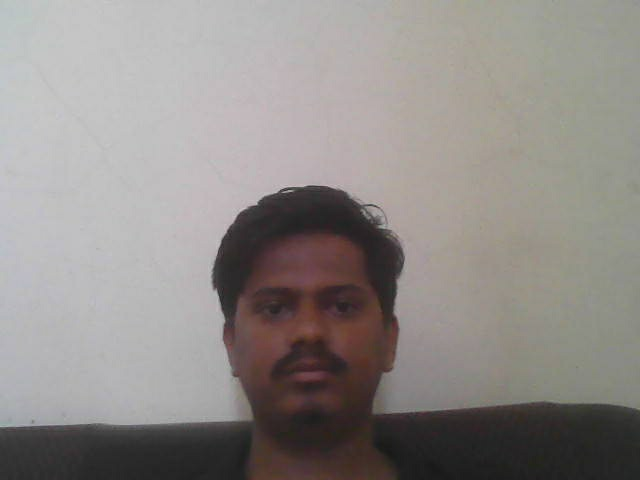

In [ ]:
# display(images.as_numpy_iterator().next())

In [ ]:
# type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib


In [ ]:
# image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
# plot_images = image_generator.next()

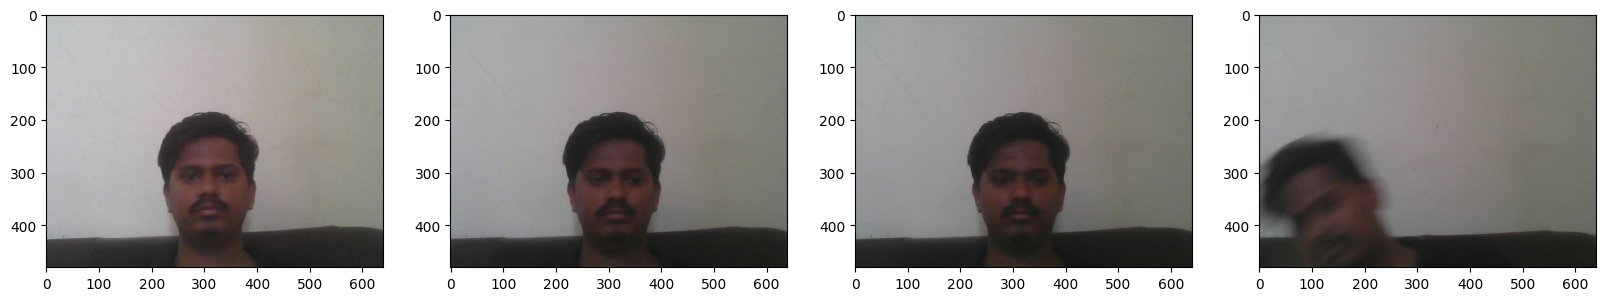

In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, image in enumerate(plot_images):
#     ax[idx].imshow(image)
# plt.show()

## 3. Partition Unaugmented Data


### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL


In [ ]:
60 *.7

42.0

In [ ]:
60*.15 # 14 and 13 to test and val

9.0

### 3.2 Move the Matching Labels


In [ ]:
# for folder in ['train','test','val']:
#     for file in os.listdir(os.path.join('/content/drive/MyDrive/FAce_det/own_face', folder, 'images')):

#         filename = file.split('.')[0]+'.json'
#         existing_filepath = os.path.join('/content/drive/MyDrive/FAce_det/own_face','labels', filename)
#         if os.path.exists(existing_filepath):
#             new_filepath = os.path.join('/content/drive/MyDrive/FAce_det/own_face',folder,'labels',filename)
#             os.replace(existing_filepath, new_filepath)

## 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline


In [ ]:
import albumentations as alb

In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON


array([[[168, 168, 168],
        [168, 168, 168],
        [168, 168, 168],
        ...,
        [121, 126, 125],
        [121, 126, 125],
        [121, 126, 125]],

       [[168, 168, 168],
        [168, 168, 168],
        [168, 168, 168],
        ...,
        [121, 126, 125],
        [121, 126, 125],
        [121, 126, 125]],

       [[168, 169, 167],
        [168, 169, 167],
        [168, 169, 167],
        ...,
        [121, 126, 125],
        [121, 126, 125],
        [121, 126, 125]],

       ...,

       [[ 37,  35,  35],
        [ 37,  35,  35],
        [ 35,  35,  35],
        ...,
        [ 27,  28,  26],
        [ 26,  27,  25],
        [ 26,  27,  25]],

       [[ 36,  34,  34],
        [ 36,  34,  34],
        [ 34,  34,  34],
        ...,
        [ 26,  27,  23],
        [ 26,  27,  23],
        [ 26,  27,  23]],

       [[ 35,  33,  33],
        [ 35,  33,  33],
        [ 34,  34,  34],
        ...,
        [ 26,  28,  22],
        [ 26,  27,  23],
        [ 26,  27,  23]]], dtype=uint8)
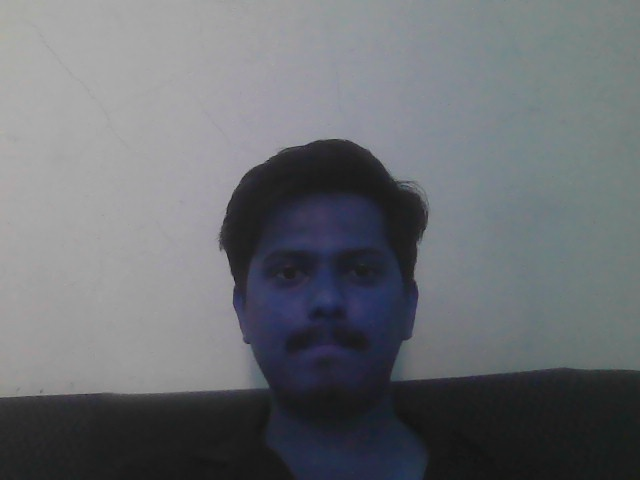

In [ ]:
img = cv2.imread(os.path.join(own_face,'train', 'images','7a6bde89-f8c6-11ee-afd1-e5bedddd6508.jpg'))
img

In [ ]:
with open(os.path.join(own_face, 'train', 'labels', '7a6bde89-f8c6-11ee-afd1-e5bedddd6508.json'), 'r') as f:
    label = json.load(f)

In [ ]:
label["shapes"][0]["points"]

[[229.88372093023256, 181.56976744186048],
 [452.5581395348837, 417.0348837209302]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution


In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:
coords

[229.88372093023256, 181.56976744186048, 452.5581395348837, 417.0348837209302]

In [ ]:
coords = list(np.divide(coords, [640,480,640,480]))

In [ ]:
coords

[0.35919331395348836,
 0.37827034883720934,
 0.7071220930232558,
 0.8688226744186046]

### 4.4 Apply Augmentations and View Results


In [ ]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [ ]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [ ]:
augmented['bboxes'][0][2:]

(0.7602583979328166, 0.6587338501291989)

In [ ]:
augmented['bboxes']

[(0.26542635658914726,
  0.13547803617571064,
  0.7602583979328166,
  0.6587338501291989)]

In [ ]:
print(augmented)

{'image': array([[[ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       ...,

       [[120, 133, 131],
        [123, 134, 132],
        [123, 134, 132],
        ...,
        [167, 167, 167],
        [167, 167, 167],
        [168, 168, 168]],

       [[119, 133, 131],
        [121, 134, 132],
        [121, 134, 132],
        ...,
        [167, 167, 167],
        [167, 167, 167],
        [167, 167, 167]],

       [[119, 133, 131],
        [120, 134, 132],
        [120, 134, 132],
        ...,
        [167, 167, 167],
        [167, 167, 167],
        [166, 

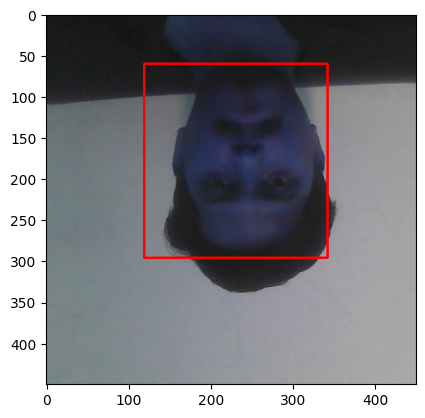

In [ ]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                    (255,0,0), 2)

plt.imshow(augmented['image'])

## 5. Build and Run Augmentation Pipeline


## 5.1 Run Augmentation Pipeline

In [ ]:
data = "/content/own_face/"
aug_data = "/content/drive/MyDrive/deep_learning_projects/FaceDetection/aug_data/"

In [ ]:
from pathlib import Path
Path(f'{aug_data}/train/images').mkdir(parents=True, exist_ok=True)
Path(f'{aug_data}/test/images').mkdir(parents=True, exist_ok=True)
Path(f'{aug_data}/val/images').mkdir(parents=True, exist_ok=True)
Path(f'{aug_data}/train/labels').mkdir(parents=True, exist_ok=True)
Path(f'{aug_data}/test/labels').mkdir(parents=True, exist_ok=True)
Path(f'{aug_data}/val/labels').mkdir(parents=True,exist_ok = True)

In [ ]:
len(os.listdir("/content/own_face/val/images"))

9

In [ ]:
len(os.listdir("/content/own_face/val/labels"))

9

In [ ]:
for partition in ['train','test','val']:
    for image in os.listdir(os.path.join(data, partition, 'images')):
        img = cv2.imread(os.path.join(data, partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join(data, partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join(aug_data, partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0


                with open(os.path.join(aug_data, partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.4845566860465116, 0.9742005813953488, 0.4845566860465116, 0.9742005813953488, 'face'].


### 5.2 Load Augmented Images to Tensorflow Dataset


In [ ]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
train_images = tf.data.Dataset.list_files(f'{aug_data}/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [ ]:
test_images = tf.data.Dataset.list_files(f'{aug_data}/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [ ]:
len(os.listdir(f"{aug_data}/val/images"))

540

In [ ]:
val_images = tf.data.Dataset.list_files(f'{aug_data}/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

array([[[0.22892156, 0.25343138, 0.22745098],
        [0.2382353 , 0.2627451 , 0.2367647 ],
        [0.2367647 , 0.26127452, 0.23382352],
        ...,
        [0.25490198, 0.27450982, 0.2509804 ],
        [0.25116423, 0.27077207, 0.24724264],
        [0.2485294 , 0.26813725, 0.24460784]],

       [[0.2372549 , 0.25686276, 0.22941177],
        [0.24221814, 0.26182598, 0.234375  ],
        [0.23529412, 0.25490198, 0.22745098],
        ...,
        [0.2509804 , 0.27058825, 0.24705882],
        [0.25441176, 0.2740196 , 0.2504902 ],
        [0.2485294 , 0.26813725, 0.24460784]],

       [[0.24117647, 0.26078433, 0.23333333],
        [0.24307598, 0.2626838 , 0.23523284],
        [0.23921569, 0.25882354, 0.23137255],
        ...,
        [0.25441176, 0.2740196 , 0.2504902 ],
        [0.25441176, 0.2740196 , 0.2504902 ],
        [0.25459558, 0.27420342, 0.250674  ]],

       ...,

       [[0.6492034 , 0.6766544 , 0.60900736],
        [0.64705884, 0.67401963, 0.6122549 ],
        [0.6505515 , 0

## 6 Prepare labels

In [ ]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset


In [ ]:
train_labels = tf.data.Dataset.list_files(f'{aug_data}/train/labels/*.json', shuffle=False)
train_labels.as_numpy_iterator().next()

b'/content/drive/MyDrive/deep_learning_projects/FaceDetection/aug_data//train/labels/7016b916-f8c6-11ee-a831-e5bedddd6508.0.json'

In [ ]:
train_labels = tf.data.Dataset.list_files(f'{aug_data}/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
test_labels = tf.data.Dataset.list_files(f'{aug_data}/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
len(os.listdir(f"{aug_data}/val/labels"))

540

In [ ]:
val_labels = tf.data.Dataset.list_files(f'{aug_data}/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3662 , 0.11224, 0.8057 , 0.5513 ], dtype=float16))

## 7. Combine Label and Image Samples


### 7.1 Check Partition Lengths


In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(2520, 2520, 480, 480, 540, 540)

### 7.2 Create Final Datasets (Images/Labels)


In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()[0].shape   # contains 8 data points

(8, 120, 120, 3)

In [ ]:
train.as_numpy_iterator().next()[1]   # 8 labels

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.176  , 0.4233 , 0.6387 , 0.899  ],
        [0.245  , 0.123  , 0.643  , 0.5776 ],
        [0.4624 , 0.4385 , 0.872  , 0.8804 ],
        [0.1818 , 0.4233 , 0.559  , 0.873  ],
        [0.1285 , 0.02669, 0.618  , 0.6353 ],
        [0.2268 , 0.0951 , 0.6763 , 0.56   ],
        [0.4006 , 0.10895, 0.814  , 0.597  ],
        [0.237  , 0.425  , 0.7153 , 0.9146 ]], dtype=float16))

In [ ]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

### 7.3 View Images and Annotations


In [ ]:
data_samples = train.as_numpy_iterator()

In [ ]:
res = data_samples.next()

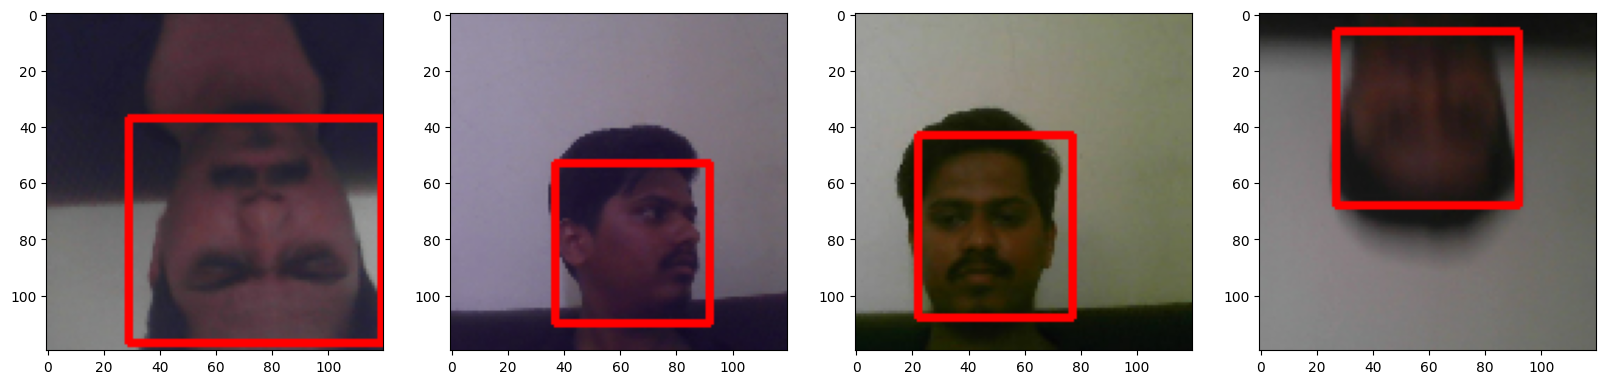

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

## 8. Build Deep Learning using the Functional API


### 8.1 Import Layers and Base Network

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [ ]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### 8.3 Build instance of Network

In [ ]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [ ]:
facetracker = build_model()

In [ ]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [ ]:
X, y = train.as_numpy_iterator().next()

In [ ]:
X.shape

(8, 120, 120, 3)

In [ ]:
y

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.4946 , 0.08405, 0.9043 , 0.526  ],
        [0.3242 , 0.1022 , 0.819  , 0.6255 ],
        [0.2788 , 0.09955, 0.6987 , 0.6074 ],
        [0.1349 , 0.1456 , 0.5264 , 0.5386 ],
        [0.3767 , 0.3914 , 0.8574 , 0.8887 ],
        [0.4426 , 0.4578 , 0.8755 , 0.897  ],
        [0.328  , 0.371  , 0.752  , 0.927  ],
        [0.1449 , 0.421  , 0.5596 , 0.886  ]], dtype=float16))

In [ ]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 3s 3s/step


In [ ]:
classes, coords

(array([[0.47772563],
        [0.48716947],
        [0.5143191 ],
        [0.5460761 ],
        [0.49610114],
        [0.5314199 ],
        [0.5088538 ],
        [0.5278229 ]], dtype=float32),
 array([[0.6398526 , 0.6943056 , 0.6418144 , 0.60602254],
        [0.59538573, 0.7200126 , 0.6332372 , 0.62192655],
        [0.6058988 , 0.7446885 , 0.65076673, 0.65641683],
        [0.51590043, 0.6337453 , 0.6688109 , 0.6469716 ],
        [0.5434648 , 0.65239227, 0.59205616, 0.659639  ],
        [0.53386325, 0.6404782 , 0.6032605 , 0.66789144],
        [0.5473041 , 0.6557438 , 0.55338895, 0.6431261 ],
        [0.5404622 , 0.6601006 , 0.57000273, 0.67389125]], dtype=float32))

## 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [ ]:
batches_per_epoch = len(train)
# lr_decay = (1./0.75 -1)/batches_per_epoch

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

### 9.2 Create Localization Loss and Classification Loss

In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [ ]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.553744>

In [ ]:
classloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7243589>

## 10. Train Neural Network

### 10.1 Create Custom Model Class

In [ ]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)

In [ ]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
%%time
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
315/315 [==============================] - 52s 82ms/step - total_loss: 0.1922 - class_loss: 0.0081 - regress_loss: 0.1882 - val_total_loss: 0.0446 - val_class_loss: 1.9372e-06 - val_regress_loss: 0.0446
Epoch 2/10
315/315 [==============================] - 40s 77ms/step - total_loss: 0.0506 - class_loss: 1.6791e-05 - regress_loss: 0.0506 - val_total_loss: 0.1171 - val_class_loss: 7.1526e-07 - val_regress_loss: 0.1171
Epoch 3/10
315/315 [==============================] - 55s 96ms/step - total_loss: 0.0315 - class_loss: 5.4999e-06 - regress_loss: 0.0315 - val_total_loss: 0.0134 - val_class_loss: 8.6427e-07 - val_regress_loss: 0.0134
Epoch 4/10
315/315 [==============================] - 44s 76ms/step - total_loss: 0.0238 - class_loss: 2.6453e-06 - regress_loss: 0.0238 - val_total_loss: 0.1305 - val_class_loss: 2.9802e-08 - val_regress_loss: 0.1305
Epoch 5/10
315/315 [==============================] - 42s 77ms/step - total_loss: 0.0167 - class_loss: 1.5749e-06 - regress_loss: 0.

In [ ]:
hist.history

{'total_loss': [0.14423561096191406,
  0.025871729478240013,
  0.014196179807186127,
  0.015078142285346985,
  0.01651669479906559,
  0.01801253668963909,
  0.00746327918022871,
  0.00471525127068162,
  0.009543295949697495,
  0.007999930530786514],
 'class_loss': [2.0728297386085615e-05,
  4.589583113556728e-06,
  4.902512955595739e-06,
  4.0233157960756216e-07,
  1.326208803220652e-06,
  2.5331982556053845e-07,
  1.937151523634384e-07,
  7.4505919656076e-07,
  1.937151523634384e-07,
  -0.0],
 'regress_loss': [0.14422523975372314,
  0.02586943469941616,
  0.014193728566169739,
  0.015077941119670868,
  0.016516031697392464,
  0.018012410029768944,
  0.00746318232268095,
  0.0047148787416517735,
  0.009543199092149734,
  0.007999930530786514],
 'val_total_loss': [0.04462859407067299,
  0.1170981153845787,
  0.013384892605245113,
  0.13045470416545868,
  0.03215451166033745,
  0.04507103189826012,
  0.09767772257328033,
  0.01697494462132454,
  0.07916449010372162,
  0.04080559313297272

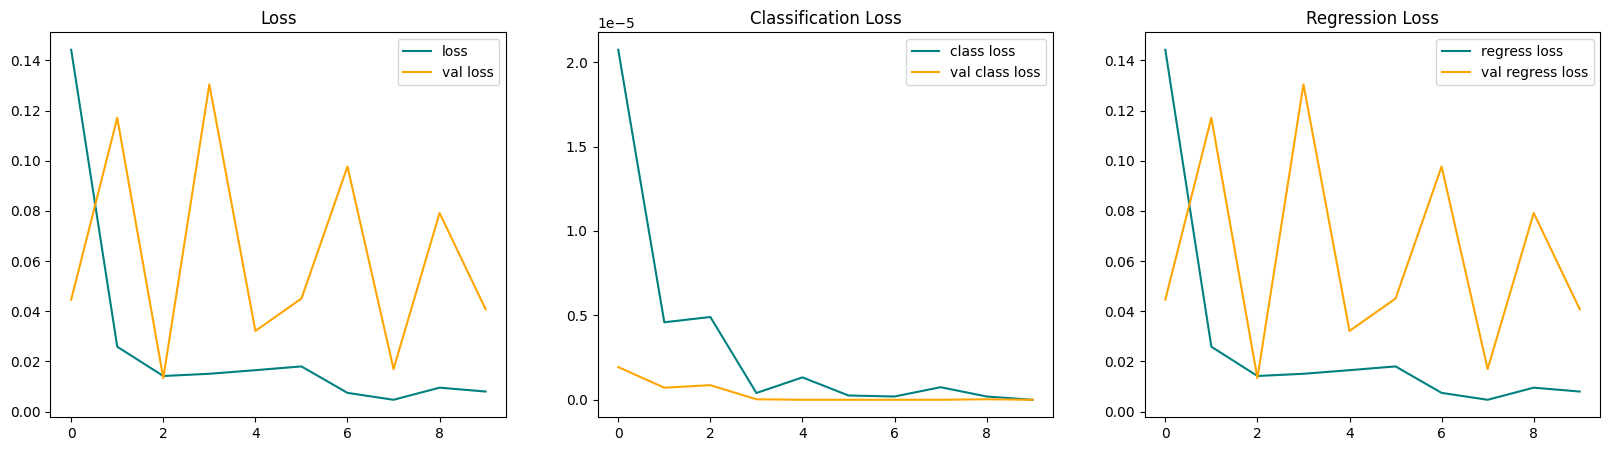

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()
test_sample[0]

array([[[[0.09558824, 0.11127451, 0.10735294],
         [0.10980392, 0.11764706, 0.11372549],
         [0.10214461, 0.10998774, 0.10606617],
         ...,
         [0.10637255, 0.11911765, 0.11519608],
         [0.0963848 , 0.11636029, 0.11029412],
         [0.09319853, 0.11378676, 0.10741422]],

        [[0.09056372, 0.10588235, 0.10196079],
         [0.10680147, 0.11464461, 0.11072304],
         [0.11464461, 0.12248775, 0.11856618],
         ...,
         [0.1098652 , 0.11672794, 0.11329657],
         [0.10680147, 0.11366422, 0.11023284],
         [0.10569853, 0.11256128, 0.1091299 ]],

        [[0.10147059, 0.10931373, 0.10539216],
         [0.10196079, 0.10980392, 0.10588235],
         [0.10245098, 0.11029412, 0.10637255],
         ...,
         [0.11372549, 0.11372549, 0.11372549],
         [0.11372549, 0.11372549, 0.11372549],
         [0.11617647, 0.11617647, 0.11617647]],

        ...,

        [[0.49050245, 0.50618875, 0.41599265],
         [0.490625  , 0.50582105, 0.41660538]

### 10.3 prediction

In [ ]:
yhat = facetracker.predict(test_sample[0][0])

InvalidArgumentError: Graph execution error:

Detected at node model/vgg16/block1_conv1/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer defined at (most recent call last):
<stack traces unavailable>
transpose expects a vector of size 3. But input(1) is a vector of size 4
	 [[{{node model/vgg16/block1_conv1/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer}}]] [Op:__inference_predict_function_243394]

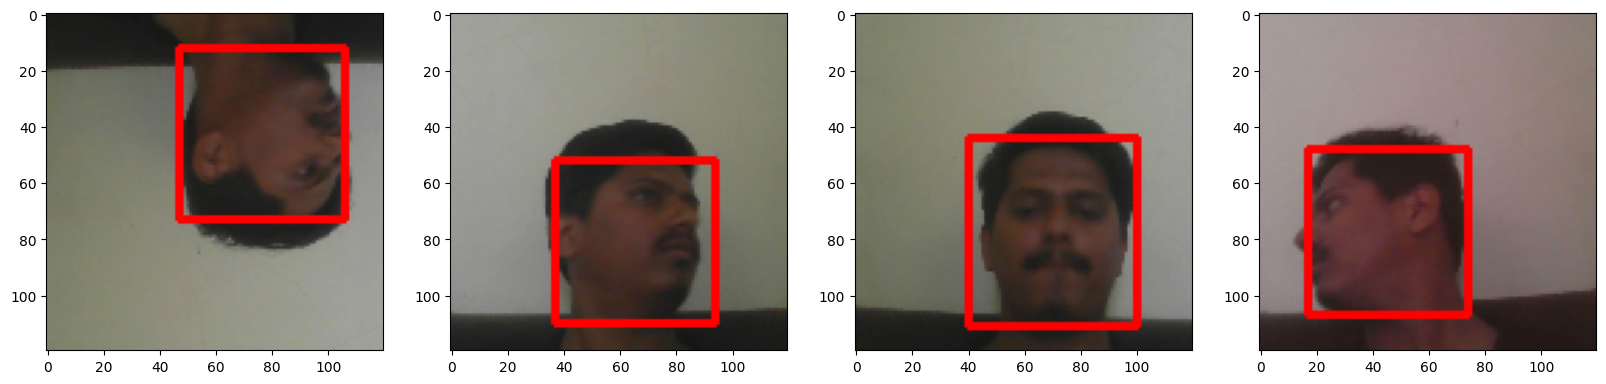

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                            (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_path ="/content/drive/MyDrive/deep_learning_projects/FaceDetection/model/"

In [ ]:
facetracker.save('facetracker.h5')

In [ ]:
facetracker = load_model('facetracker.h5')

### 10.4 custom image  detection

In [ ]:
test_image = "/content/test_image.jpg"
test_image = load_image(test_image)
test_image = tf.image.resize(test_image, (120,120))
test_image = test_image/255

In [ ]:
test_image.shape

TensorShape([120, 120, 3])

In [ ]:
test_sample[0][0].shape

(120, 120, 3)

In [ ]:
# shape = tf.TensorShape([120, 120, 3])
tuple_shape = tuple(test_image.shape.as_list())

print(tuple_shape)

(120, 120, 3)


In [ ]:
facetracker.predict(test_image)

InvalidArgumentError: Graph execution error:

Detected at node model/vgg16/block1_conv1/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer defined at (most recent call last):
<stack traces unavailable>
transpose expects a vector of size 3. But input(1) is a vector of size 4
	 [[{{node model/vgg16/block1_conv1/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer}}]] [Op:__inference_predict_function_243394]

In [ ]:
import tensorflow as tf

# Assuming test_image is your tensor with shape TensorShape([120, 120, 3])
test_image = tf.random.normal([120, 120, 3])

# Reshape test_image into a vector of size 3
vector_image = tf.reshape(test_image, [-1, 3])

print(vector_image.shape)  # Output should be TensorShape([14400, 3])